In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive (3).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 116ms/step - loss: 1.0965 - accuracy: 0.6115 - val_loss: 0.5693 - val_accuracy: 0.7138
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5365 - accuracy: 0.7328 - val_loss: 0.6809 - val_accuracy: 0.6876
Epoch 3/10
625/625 [==============================] - 74s 118ms/step - loss: 0.4644 - accuracy: 0.7830 - val_loss: 0.4862 - val_accuracy: 0.7666
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3968 - accuracy: 0.8232 - val_loss: 0.4578 - val_accuracy: 0.7752
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3269 - accuracy: 0.8575 - val_loss: 0.4570 - val_accuracy: 0.7930
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2481 - accuracy: 0.8964 - val_loss: 0.5384 - val_accuracy: 0.8056
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1698 - accuracy: 0.9327 - val_loss: 0.6810 - val_ac

In [15]:
import cv2
import matplotlib.pyplot as plt

In [16]:
test_img = cv2.imread('/content/cat.jpg')

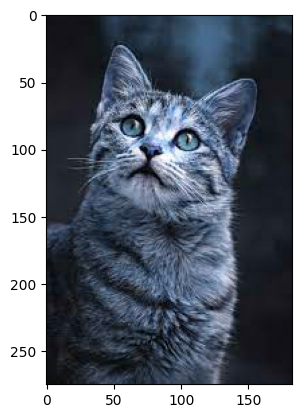

In [17]:
plt.imshow(test_img)

In [18]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 294ms/step


array([[0.]], dtype=float32)

In [19]:
test_img = cv2.imread('/content/dog.jpg')

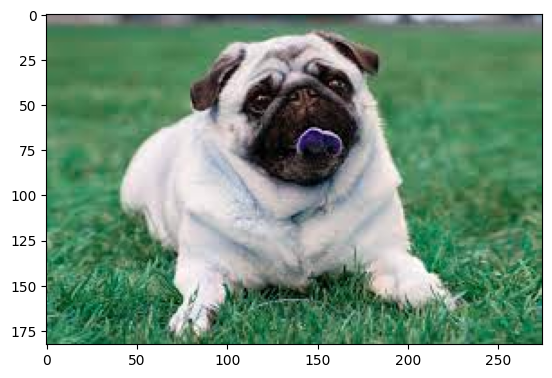

In [20]:
plt.imshow(test_img)

In [21]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 44ms/step


array([[0.]], dtype=float32)